In [7]:
import sys
sys.path.append('../..')
sys.path.append('../data')
sys.path.append('../../helper_code')

from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import numpy as np
import pandas as pd
from IPython.display import display
import copy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from helper_code.custom_kernel import *
from helper_code.util import *

In [8]:
input_dataset = ['c', 'c_lexi', 'CE', 'CE_lexi', 'CSE', 'CSE_lexi']
dataset_dict = {}

for data in input_dataset:
    dataset_dict[data] = pd.read_csv(f'../data/coronene_training_data/{data}.csv')

delta_total_energy = pd.read_csv(f'../data/coronene_training_data/delta_total_energy.csv')
delta_delta_total_energy = pd.read_csv(f'../data/coronene_training_data/delta_delta_total_energy.csv')

In [9]:
model_collection = {}
performance_summary = {}

## Vanilla ##

In [10]:
X = dataset_dict['c'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 4.6e-11, 'gamma': 2.8e-08, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 3

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_Gaussian_delta'] = model
performance_summary['ANM_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,2207.25606,43.680545
2,128,2023.2727,18.574367
3,256,1900.658783,8.85735
4,512,1850.867457,11.380456
5,1024,1764.143502,16.160923
6,2048,1642.534578,16.690788


In [11]:
X = dataset_dict['c_lexi'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 4.6e-11, 'gamma': 2.8e-08, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 3

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_lexi_Gaussian_delta'] = model
performance_summary['ANM_lexi_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,1399.964162,50.512098
2,128,1282.243509,10.144129
3,256,1210.07527,10.366789
4,512,1171.024337,4.970986
5,1024,1147.077516,5.279287
6,2048,1077.646477,16.774436


## CE with Gaussian ##

In [12]:
X = dataset_dict['CE'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 4.6e-11, 'gamma': 2.8e-08, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 3

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CE_Gaussian_delta'] = model
performance_summary['ANM_CE_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,2196.556266,44.993318
2,128,1997.006857,18.506956
3,256,1842.702976,9.204117
4,512,1744.564806,12.854109
5,1024,1584.88972,16.712787
6,2048,1383.945264,12.476046


In [13]:
X = dataset_dict['CE_lexi'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 4.6e-11, 'gamma': 2.8e-08, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 3

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CE_lexi_Gaussian_delta'] = model
performance_summary['ANM_CE_lexi_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,1395.40005,51.917156
2,128,1269.31978,12.131394
3,256,1185.484398,10.60579
4,512,1127.624,4.812384
5,1024,1073.339739,5.597906
6,2048,961.286331,13.427454


## CSE with Gaussian ##

In [14]:
X = dataset_dict['CSE'].to_numpy()
y = delta_total_energy.to_numpy()

best_params = {'alpha': 1.6596764933651303e-07, 'gamma': 2.1567299387422978e-06, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 3

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_Gaussian'] = model
performance_summary['ANM_CSE_Gaussian'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,52.47474,3.225428
2,128,42.69203,0.177203
3,256,40.066328,0.439763
4,512,37.466687,0.247036
5,1024,35.666016,0.261348
6,2048,32.206831,0.593538


In [15]:
X = dataset_dict['CSE_lexi'].to_numpy()
y = delta_total_energy.to_numpy()

best_params = {'alpha': 1.6596764933651303e-07, 'gamma': 2.1567299387422978e-06, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 3

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_lexi_Gaussian'] = model
performance_summary['ANM_CSE_lexi_Gaussian'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,54.455673,0.540912
2,128,43.283345,0.484325
3,256,40.159256,0.574278
4,512,37.130941,0.206814
5,1024,35.256146,0.376372
6,2048,32.037482,0.415658


In [16]:
X = dataset_dict['CSE'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 1.6596764933651303e-07, 'gamma': 2.1567299387422978e-06, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 3

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_Gaussian_delta'] = model
performance_summary['ANM_CSE_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,51.412771,2.978195
2,128,42.361086,0.251136
3,256,39.815895,0.446142
4,512,37.340479,0.258027
5,1024,35.662149,0.246205
6,2048,32.25687,0.582145


In [17]:
X = dataset_dict['CSE_lexi'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 1.6596764933651303e-07, 'gamma': 2.1567299387422978e-06, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 3

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_lexi_Gaussian_delta'] = model
performance_summary['ANM_CSE_lexi_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,52.66072,0.664131
2,128,42.974602,0.602625
3,256,39.990904,0.582874
4,512,37.032272,0.214642
5,1024,35.241319,0.375313
6,2048,32.061988,0.380247


## Local CSE ##

In [18]:
CSE_local = np.genfromtxt("../data/coronene_training_data/CSE_local.csv", delimiter=',').reshape((2400, 24, 24))
coronene_energy_raw_data = np.load("../data/coronene_raw_data/coronene_mutants_pbe0_pcx2.npz", allow_pickle=True)
charges = coronene_energy_raw_data['charges'][:, :24]

In [19]:
# X = CSE_local
# y = delta_delta_total_energy.to_numpy()
# best_params = {'lambda': 0.20189699004012868, 'length': 1.9495988615657756}

# columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
# model_performance = pd.DataFrame(columns=columns)

# training_size = [2**i for i in range(6, 12)]
# num_trials = 3

# with warnings.catch_warnings():
#     for index, num_training_sample in enumerate(training_size):
#         warnings.filterwarnings("ignore")
#         index = index + 1
#         average_error, std_dev_error = evaluate_performance_local(best_params, X, y, charges, num_training_sample, num_trials)
#         model_performance.at[index, 'training size'] = num_training_sample
#         model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
#         model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000
#         print(average_error)

# performance_summary['CSE_local'] = model_performance

# display(model_performance)

## CSE with Extended Gaussian ##

In [20]:
X = dataset_dict['CSE_lexi']
y = delta_delta_total_energy

best_params = {'alpha': 1.6325534121318924e-12, 'beta': 1.030148124201919e-08, 'epsilon': 2.371039073470382e-05, 'gamma': 5.275010647453131e-09}
model = KernelRidge(kernel='precomputed', alpha=best_params['alpha'])

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 3

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance_custom_kernel(model, X, y, num_training_sample, num_trials, extended_gaussian_kernel_nb, best_params)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_lexi_ex_Gaussian_delta'] = model
performance_summary['ANM_CSE_lexi_ex_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,100.80181,5.67292
2,128,50.348407,1.212907
3,256,34.114579,0.321041
4,512,29.267164,0.056195
5,1024,28.308901,0.330275
6,2048,27.80915,0.711655


## Learning Curve ##

In [21]:
print(performance_summary.keys())

dict_keys(['ANM_Gaussian_delta', 'ANM_lexi_Gaussian_delta', 'ANM_CE_Gaussian_delta', 'ANM_CE_lexi_Gaussian_delta', 'ANM_CSE_Gaussian', 'ANM_CSE_lexi_Gaussian', 'ANM_CSE_Gaussian_delta', 'ANM_CSE_lexi_Gaussian_delta', 'ANM_CSE_lexi_ex_Gaussian_delta'])


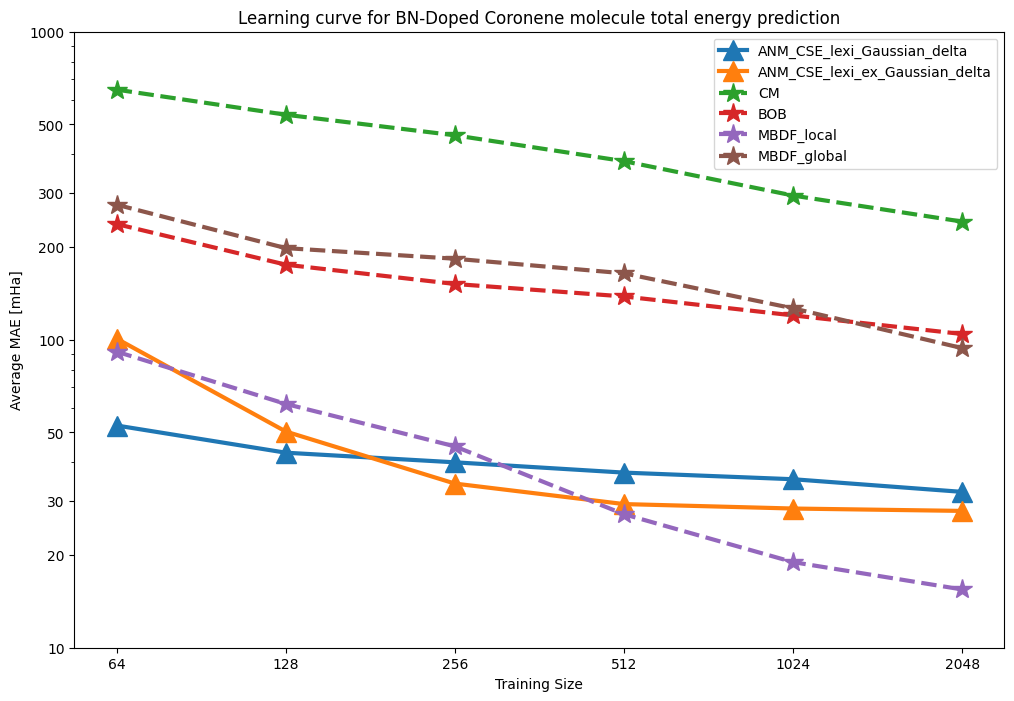

In [22]:
# performance_summary.pop("ANM_CSE_lexi_nd_Gaussian_delta")

target_key = ['ANM_CSE_lexi_Gaussian_delta', 'ANM_CSE_lexi_ex_Gaussian_delta']

plt.figure(figsize=(12, 8))

baseline = {'CM': [648.5527354673592, 537.6985692537448, 461.0180882987335, 379.9858538857778, 293.8438973546341, 241.82578139489823], 
            'BOB': [237.41250993141233, 175.25626039916506, 151.71095095761646, 138.19860398430035, 119.94745348162638, 104.37619882451854], 
            'MBDF_local': [91.45978157923743, 61.880635092542924, 45.05741969642941, 27.131326474704487, 18.96572152685743, 15.459664235069118], 
            'MBDF_global': [274.40293174604693, 198.34254220451777, 183.23390683681885, 164.29180299704285, 126.44938842117904, 93.92669161271573]}

x = performance_summary['ANM_lexi_Gaussian_delta']['training size']
y_values = {}
baseline_y = {}
for key, df in performance_summary.items():
    if key in target_key:
        y_values[key] = df['average MAE (mHa)']
for key, value in baseline.items():
    baseline_y[key] = value

linewidth = 3
markersize = 15

for key, y_value in y_values.items():
    plt.plot(x, y_value, label=key, marker='^', linestyle='-', linewidth=linewidth, markersize=markersize)
for key, y_value in baseline_y.items():
    plt.plot(x, y_value, label=key, marker='*', linestyle='--', linewidth=linewidth, markersize=markersize) 


plt.title('Learning curve for BN-Doped Coronene molecule total energy prediction')
plt.xlabel('Training Size')
plt.ylabel('Average MAE [mHa]')
plt.legend()

plt.xscale('log', base=2)
plt.yscale('log', base=10)
xticks = [2**i for i in range(6, 12)]
yticks = [10, 20, 30, 50, 100, 200, 300, 500, 1000]
plt.xticks(xticks, labels = xticks)
plt.yticks(yticks, labels = yticks)

plt.savefig('../graph/[Coronene] [5.0] Learning curve for BN-Doped Coronene molecule total energy prediction.png', dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
x = performance_summary['ANM_Gaussian']['training size']
y = performance_summary['ANM_CSE_lexi_Gaussian_delta']['average MAE (mHa)']
plt.plot(x, y, label=key, marker='^', linestyle='-', linewidth=linewidth, markersize=markersize)

plt.title('Learning curve for BN-Doped Coronene molecule total energy prediction')
plt.xlabel('Training Size')
plt.ylabel('Average MAE [mHa]')
plt.legend()

plt.xscale('log', base=2)
plt.yscale('log', base=10)
xticks = [2**i for i in range(6, 12)]
yticks = [100, 200]
plt.xticks(xticks, labels = xticks)
plt.yticks(yticks, labels = yticks)

plt.show()